In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
import kagglehub

path = kagglehub.dataset_download("patricklford/global-ev-sales-2010-2024")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/global-ev-sales-2010-2024


# Step 1: Analyze and visualize the EV stock share from 2010 - 2023

## Initialize the Pandas Data-Frame

In [2]:
dataset_name = path + "/IEA Global EV Data 2024.csv"
pandas_frame = pd.read_csv(dataset_name)

In [3]:
pandas_frame.head(100)

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000
...,...,...,...,...,...,...,...,...
95,Austria,Historical,EV stock share,Cars,EV,2010,percent,0.00790
96,Austria,Historical,EV stock share,Cars,EV,2011,percent,0.02200
97,Austria,Historical,EV charging points,EV,Publicly available fast,2011,charging points,0.10000
98,Austria,Historical,EV charging points,EV,Publicly available slow,2011,charging points,0.10000


## Filter the DataFrame for the relevant metric (EV stock share)

Filtering the dataframe for the stock share metric and exclude fields that are not relevant for further calculations.

In [4]:
electric_vehicle_frame = pandas_frame[(pandas_frame['parameter'] == 'EV stock share') & (pandas_frame['mode'] == 'Cars')]
electric_vehicle_frame = electric_vehicle_frame[['region', 'year', 'value']]
electric_vehicle_frame = electric_vehicle_frame.drop_duplicates(subset=['year', 'region'], keep='last')
electric_vehicle_frame = electric_vehicle_frame[electric_vehicle_frame['year'] <= 2023]

In [5]:
electric_vehicle_frame.head(10)

,region,year,value
0,Australia,2011,0.00039
7,Australia,2012,0.00240
12,Australia,2013,0.00460
19,Australia,2014,0.01400
24,Australia,2015,0.02700
31,Australia,2016,0.03700
36,Australia,2017,0.05200
47,Australia,2018,0.07700
52,Australia,2019,0.14000
61,Australia,2020,0.18000


## Visualize the EV stock share over the years

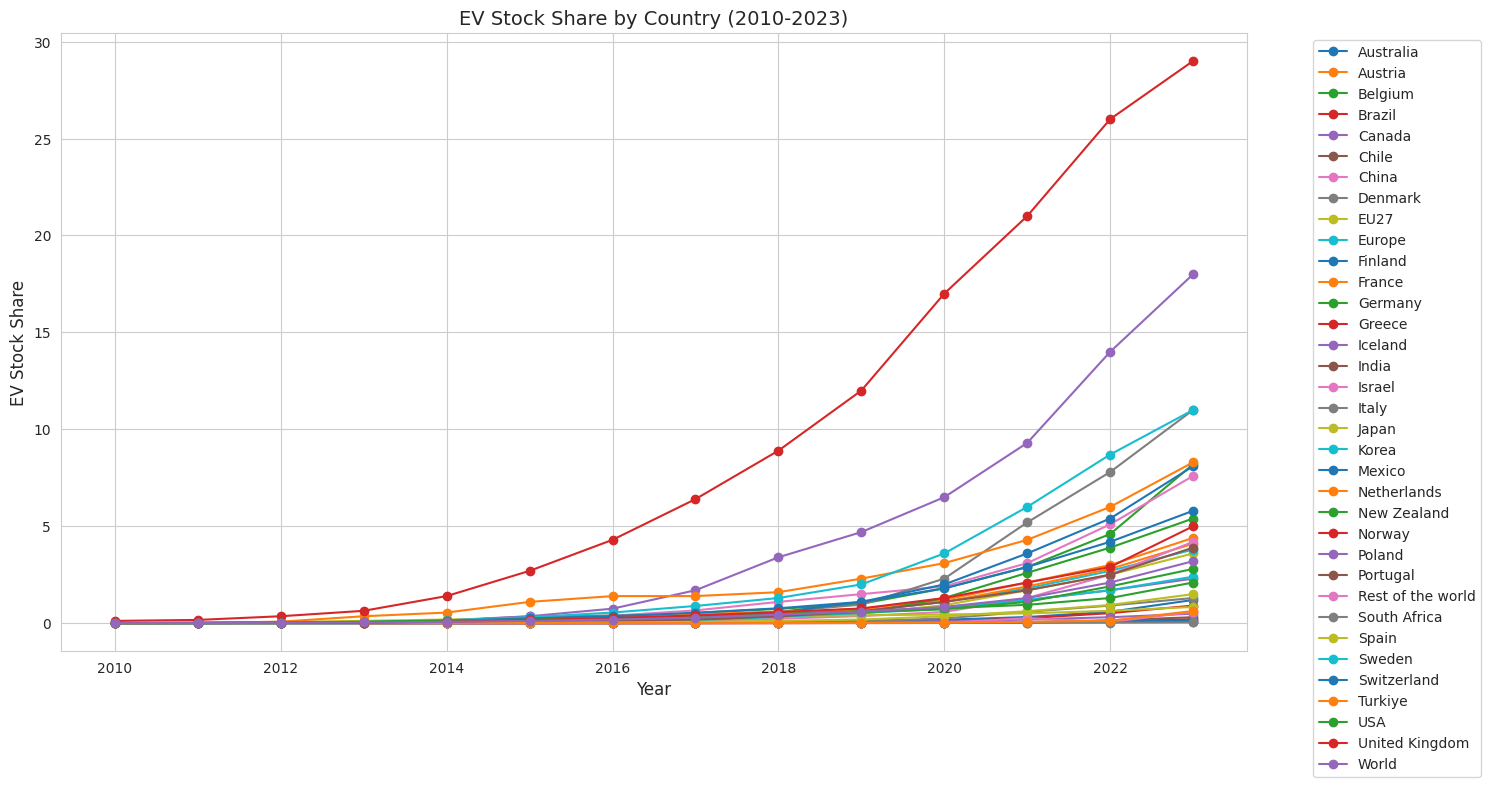

In [6]:
pivot_df = electric_vehicle_frame.pivot(index='year', columns='region', values='value')
plt.figure(figsize=(15, 8))
    
for country in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[country], marker='o', label=country)
    
plt.title('EV Stock Share by Country (2010-2023)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('EV Stock Share', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 2: Analyze and visualize the Air-Quality-Data from 2010 - 2023

In [7]:
dataset_name = "/kaggle/input/air-quality-2018-2024-iqair-ag/air-quality-2018-2023.json"
air_quality_frame = pd.read_json(dataset_name)

In [8]:
air_quality_frame.head(10)

,rank,countryID,country,population,url,flagURL,avg2019,avg2018,avg2020,avg2021,avg2022,avg2023,year,createdAt,updatedAt,name,averageAQI
0,1,C6qfKtSfvq5FAxdC8,Bangladesh,169356251,/bangladesh,https://cdn.airvisual.net/flags/bangladesh.jpg,83.3,97.1,77.1,76.9,65.8,79.9,2023,2024-03-07T02:14:37.470Z,2024-03-07T02:14:37.470Z,Bangladesh,164
1,2,G4AjQzTgGNNSMWdNJ,Pakistan,231402117,/pakistan,https://cdn.airvisual.net/flags/pakistan.jpg,65.8,74.3,59.0,66.8,70.9,73.7,2023,2024-03-07T02:14:37.496Z,2024-03-07T02:14:37.496Z,Pakistan,160
2,3,SPLi4goKT3JDgP4Mm,India,1407563842,/india,https://cdn.airvisual.net/flags/india.jpg,58.1,72.5,51.9,58.1,53.3,54.4,2023,2024-03-07T02:14:37.482Z,2024-03-07T02:14:37.482Z,India,147
3,4,5b9f12d97c0ce216c822baa8,Tajikistan,9750064,/tajikistan,https://cdn.airvisual.net/flags/tajikistan.jpg,NaN,NaN,30.9,59.4,46.0,49.0,2023,2024-03-07T02:14:37.504Z,2024-03-07T02:14:37.504Z,Tajikistan,134
4,5,5b9f12d97c0ce216c822ba2a,Burkina Faso,22100683,/burkina-faso,https://cdn.airvisual.net/flags/burkina-faso.jpg,NaN,NaN,NaN,NaN,63.0,46.6,2023,2024-03-07T02:14:37.474Z,2024-03-07T02:14:37.474Z,Burkina Faso,128
5,6,5b9f12d97c0ce216c822ba62,Iraq,43533592,/iraq,https://cdn.airvisual.net/flags/iraq.jpg,39.6,NaN,NaN,49.7,80.1,43.8,2023,2024-03-07T02:14:37.483Z,2024-03-07T02:14:37.483Z,Iraq,121
6,7,6QFDyjTWy645DReov,United Arab Emirates,9365145,/united-arab-emirates,https://cdn.airvisual.net/flags/united-arab-em...,38.9,49.9,29.2,36.0,45.9,43.0,2023,2024-03-07T02:14:37.506Z,2024-03-07T02:14:37.506Z,United Arab Emirates,119
7,8,TXhR7fZuAhaRefpKb,Nepal,30034989,/nepal,https://cdn.airvisual.net/flags/nepal.jpg,44.5,54.1,39.2,46.0,40.1,42.4,2023,2024-03-07T02:14:37.495Z,2024-03-07T02:14:37.495Z,Nepal,118
8,9,5ac1cb300b9e8b42e7321072,Egypt,109262178,/egypt,https://cdn.airvisual.net/flags/egypt.jpg,18.0,NaN,NaN,29.1,46.5,42.4,2023,2024-03-07T02:14:37.477Z,2024-03-07T02:14:37.477Z,Egypt,118
9,10,5b9f12d97c0ce216c822ba38,Democratic Republic of the Congo,95894118,/democratic-republic-of-the-congo,https://cdn.airvisual.net/flags/democratic-rep...,32.1,NaN,NaN,NaN,15.5,40.8,2023,2024-03-07T02:14:37.476Z,2024-03-07T02:14:37.476Z,Democratic Republic of the Congo,114


## Filter the DataFrame for the relevant metric (country, 2018, 2019,...)

In [9]:
air_quality_frame = air_quality_frame[['country', 'avg2018', 'avg2019', 'avg2020', 'avg2021', 'avg2022','avg2023']]
air_quality_frame.columns = air_quality_frame.columns.str.replace('avg', '')
ev_countries = electric_vehicle_frame['region'].unique()
air_quality_frame = air_quality_frame[air_quality_frame['country'].isin(ev_countries)]

In [10]:
air_quality_frame.head(10)

,country,2018,2019,2020,2021,2022,2023
2,India,72.5,58.1,51.9,58.1,53.3,54.4
18,China,41.2,39.1,34.7,32.6,30.6,32.5
45,Mexico,20.3,20.0,18.9,19.3,19.5,20.1
46,South Africa,NaN,21.6,18.0,22.7,23.4,19.9
52,Chile,24.9,22.6,19.3,21.7,22.2,18.8
55,Israel,18.6,20.8,16.9,18.7,18.8,17.8
56,Greece,NaN,22.5,18.4,19.0,19.0,17.4
70,Italy,14.9,17.1,18.5,15.2,18.9,15.0
73,Poland,22.4,18.7,16.9,19.1,16.3,14.1
82,Brazil,16.3,15.8,14.2,13.6,12.2,12.6


## Append datasets from 2010-2017 to the 2018-2023 dataset

In [11]:
for year in range(2010, 2018):
    dataset_path = "/kaggle/input/aq-who-2010-2017/data_AQ_WHO/AQ" + str(year) + ".csv"
    who_data = pd.read_csv(dataset_path, sep=None, engine='python')[['First Location', 'First Period', 'First FactValueForMeasure']]

    if str(year) not in air_quality_frame.columns:
        air_quality_frame[str(year)] = 0.0  # Initialize with float instead of int
    else:
        air_quality_frame[str(year)] = air_quality_frame[str(year)].astype(float)
    
    value_map = dict(zip(who_data['First Location'], who_data['First FactValueForMeasure']))
    
    for idx in air_quality_frame.index:
        country_name = air_quality_frame.loc[idx, 'country']
        if country_name == "USA":
            country_name = "United States of America"
        if country_name == "Netherlands":
            country_name = "Netherlands (Kingdom of the)"
        if country_name == "United Kingdom":
            country_name = "United Kingdom of Great Britain and Northern Ireland"
        if country_name in value_map:
            air_quality_frame.at[idx, str(year)] = float(value_map[country_name])
            
cols = ['country'] + sorted([col for col in air_quality_frame.columns if col != 'country'])
air_quality_frame = air_quality_frame.reindex(cols, axis=1)
air_quality_frame.head(100)

,country,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
2,India,55.17,55.05,55.72,58.20,55.89,55.48,53.00,51.30,72.5,58.1,51.9,58.1,53.3,54.4
18,China,47.18,51.92,53.43,64.93,55.40,51.76,47.61,46.90,41.2,39.1,34.7,32.6,30.6,32.5
45,Mexico,22.13,23.53,22.24,23.19,21.56,21.80,21.21,20.44,20.3,20.0,18.9,19.3,19.5,20.1
46,South Africa,18.69,18.67,18.68,18.82,18.98,19.14,19.07,19.38,NaN,21.6,18.0,22.7,23.4,19.9
52,Chile,22.25,22.50,22.01,23.83,23.14,24.15,23.75,22.69,24.9,22.6,19.3,21.7,22.2,18.8
55,Israel,24.23,23.71,22.15,22.07,20.43,21.65,19.90,19.54,18.6,20.8,16.9,18.7,18.8,17.8
56,Greece,19.70,19.55,17.70,17.32,15.61,16.45,15.17,15.20,NaN,22.5,18.4,19.0,19.0,17.4
70,Italy,20.11,20.73,18.52,17.91,16.69,17.28,15.82,15.73,14.9,17.1,18.5,15.2,18.9,15.0
73,Poland,26.32,27.02,24.47,23.36,23.45,22.59,21.34,21.96,22.4,18.7,16.9,19.1,16.3,14.1
82,Brazil,14.60,14.89,14.14,13.15,13.29,12.05,12.00,14.86,16.3,15.8,14.2,13.6,12.2,12.6


## Visualize the Air Pollution over the years

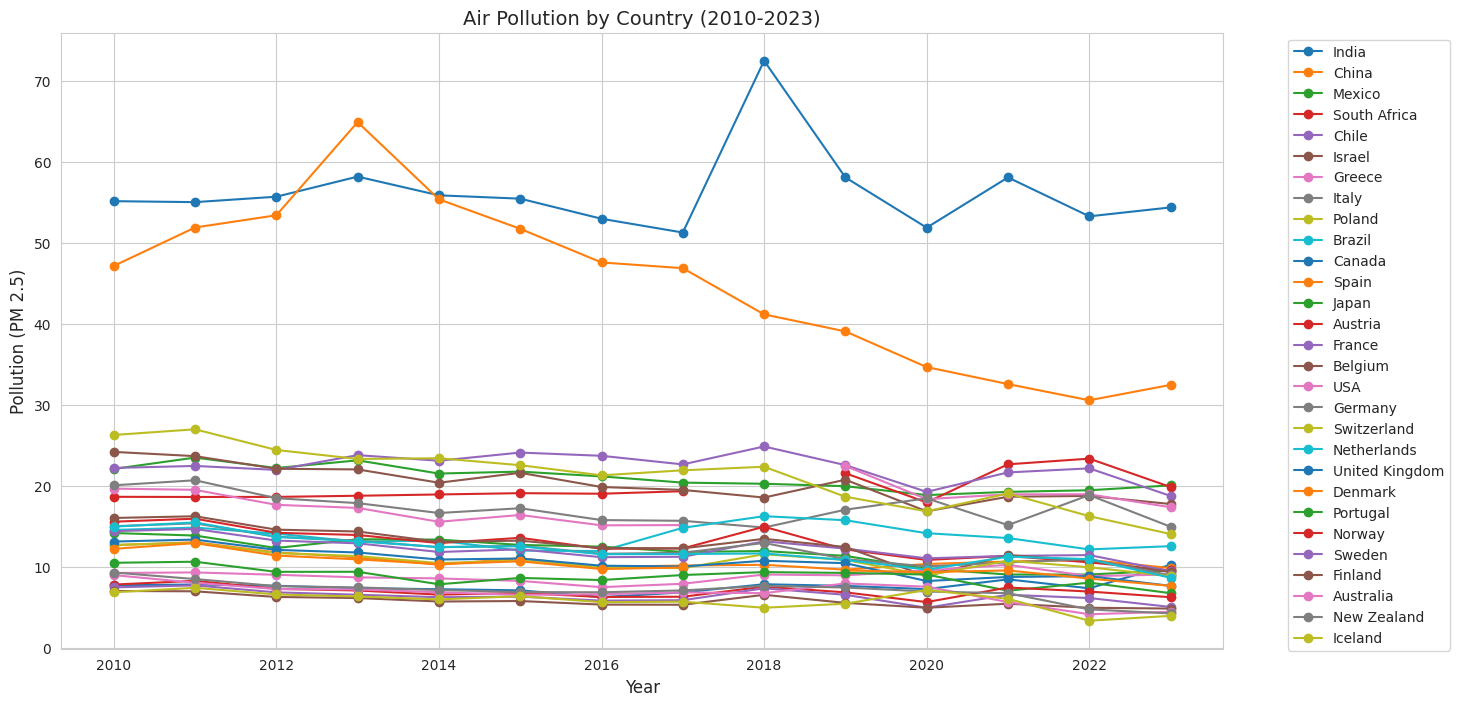

In [12]:
plt.figure(figsize=(15, 8))

# Iterate through each country
for index, row in air_quality_frame.iterrows():
    country = row['country']
    # Get the years data (excluding the country column) and plot
    rows = []
    for year in range(2010, 2024):
        rows.append(str(year))
    years_data = row[rows]
    plt.plot(years_data.index.astype(int), years_data.values, marker='o', label=country)

plt.title('Air Pollution by Country (2010-2023)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Pollution (PM 2.5)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Step 3: Analysis of the correlation of the EV stock share and the air pollution

## Calculation of the Pearson Correlation Coefficient

In [13]:
# First, reshape air_pollution data to long format
air_quality_long = air_quality_frame.melt(
    id_vars=['country'],
    var_name='year',
    value_name='air_quality'
)

# Rename the 'value' column in electric vehicle data for clarity
electric_vehicle_frame = electric_vehicle_frame.rename(columns={'value': 'ev_adoption'})

# Convert year to numeric
air_quality_long['year'] = pd.to_numeric(air_quality_long['year'])

# Rename the 'value' column in electric vehicle data for clarity
electric_vehicle_frame = electric_vehicle_frame.rename(columns={'value': 'ev_adoption'})

# Merge the datasets
merged_df = pd.merge(
    air_quality_long,
    electric_vehicle_frame,
    on='year',
    how='inner'
)

# Calculate correlation coefficient for each country
correlation_df = merged_df.groupby('country').apply(
    lambda x: x['air_quality'].corr(x['ev_adoption'])
).reset_index()
correlation_df.columns = ['country', 'correlation']

# Sort by absolute correlation value
correlation_df['abs_corr'] = correlation_df['correlation'].abs()
correlation_df = correlation_df.sort_values('abs_corr', ascending=False).drop('abs_corr', axis=1)

# Display the results
correlation_df

,country,correlation
21,Poland,-0.423280
19,New Zealand,-0.416517
16,Japan,-0.411795
7,Denmark,-0.397436
28,United Kingdom,-0.391202
0,Australia,-0.388513
6,China,-0.387078
1,Austria,-0.386707
10,Germany,-0.371944
2,Belgium,-0.364046


## Analysing the correlations for each country

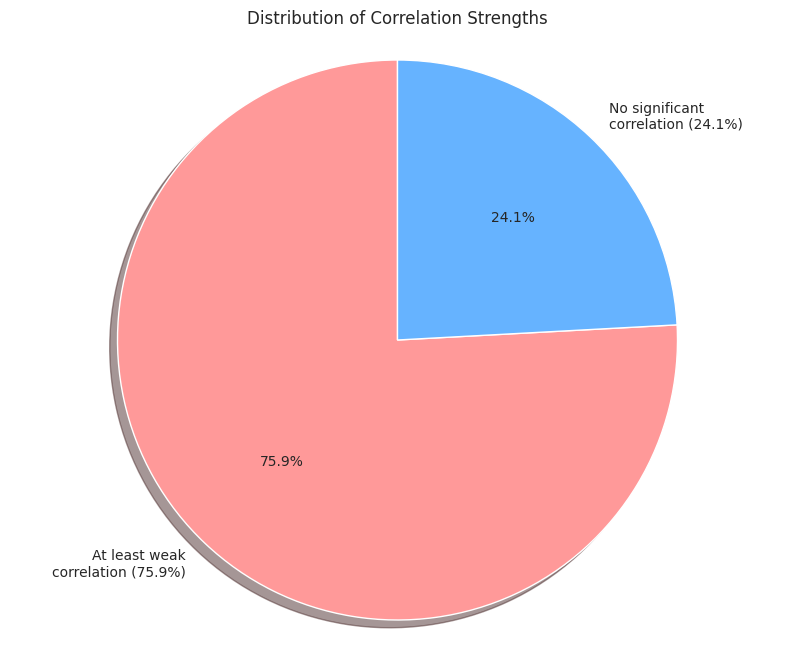

In [14]:
# Calculate 90% confidence interval
n = len(correlation_df)
z_score = stats.norm.ppf(0.975)  # for 90% CI (two-sided)
    
# Fisher's Z-Transformation for more precise confidence intervals
z_transform = np.arctanh(correlation_df['correlation'])
stderr = 1/np.sqrt(n-3)
ci_lower = np.tanh(z_transform - (z_score * stderr))
ci_upper = np.tanh(z_transform + (z_score * stderr))

# Add confidence intervals to DataFrame
correlation_df['ci_lower'] = ci_lower
correlation_df['ci_upper'] = ci_upper

# Count countries with at least weak correlation (|r| >= 0.2)
weak_corr = correlation_df[abs(correlation_df['correlation']) >= 0.2]
no_corr = correlation_df[abs(correlation_df['correlation']) < 0.2]

n_weak = len(weak_corr)
n_none = len(no_corr)

# Calculate percentages
percent_weak = (n_weak / n) * 100
percent_none = (n_none / n) * 100

# Create pie chart
plt.figure(figsize=(10, 8))
labels = [f'At least weak\ncorrelation ({percent_weak:.1f}%)', 
          f'No significant\ncorrelation ({percent_none:.1f}%)']
sizes = [n_weak, n_none]
colors = ['#ff9999', '#66b3ff']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=90, shadow=True)
plt.axis('equal')
plt.title('Distribution of Correlation Strengths')

# Show the plot
plt.show()


In [15]:
# Calculate R-squared (coefficient of determination)
correlation_df['r_squared'] = correlation_df['correlation'] ** 2

# Sort by R-squared value in descending order
correlation_df_sorted = correlation_df.sort_values('r_squared', ascending=False)

# Create a summary DataFrame with both r and r² values
summary_df = correlation_df_sorted[['country', 'correlation', 'r_squared']].copy()
summary_df.columns = ['Country', 'r (Correlation)', 'r² (Coefficient of Determination)']

# Round the values for better readability
summary_df = summary_df.round(4)

# Display results
print("R-squared Analysis:")
print("\nTop 5 countries with highest explained variance:")
print(summary_df.head().to_string(index=False))
print("\nBottom 5 countries with lowest explained variance:")
print(summary_df.tail().to_string(index=False))

# Calculate average r² value
mean_r_squared = correlation_df['r_squared'].mean()
print(f"\nAverage r² across all countries: {mean_r_squared:.4f}")
print(f"This means on average {(mean_r_squared * 100):.1f}% of the variance is explained by the correlation")


R-squared Analysis:

Top 5 countries with highest explained variance:
       Country  r (Correlation)  r² (Coefficient of Determination)
        Poland          -0.4233                             0.1792
   New Zealand          -0.4165                             0.1735
         Japan          -0.4118                             0.1696
       Denmark          -0.3974                             0.1580
United Kingdom          -0.3912                             0.1530

Bottom 5 countries with lowest explained variance:
Country  r (Correlation)  r² (Coefficient of Determination)
 Brazil          -0.1441                             0.0208
  Italy          -0.1437                             0.0207
 Norway          -0.1342                             0.0180
 Greece           0.0952                             0.0091
  India          -0.0615                             0.0038

Average r² across all countries: 0.1007
This means on average 10.1% of the variance is explained by the correlation

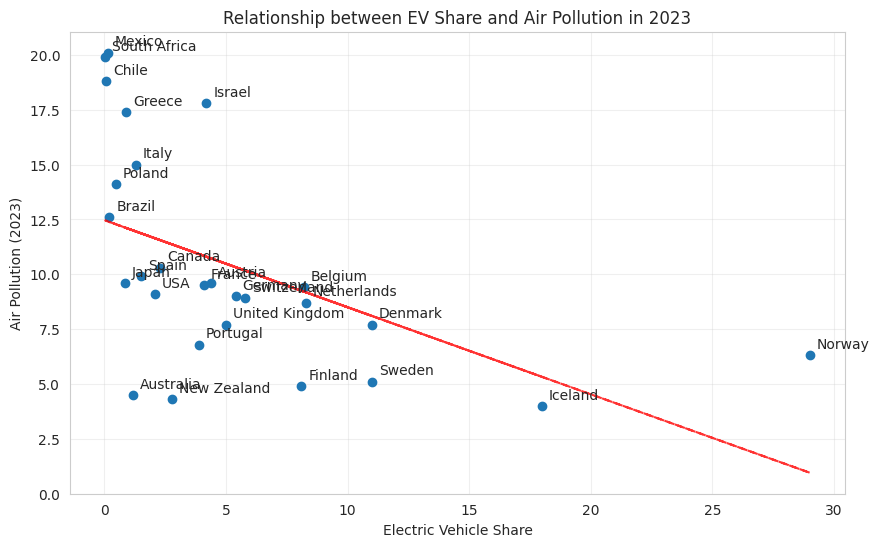

Overall correlation coefficient between 2023 air pollution and EV share: -0.5169

r² across all countries: 0.2672
This means on average 26.7% of the variance is explained by the correlation


In [16]:
# Get 2023 air pollution data
air_quality_2023 = air_quality_long[
    (air_quality_long['year'] == 2023) & 
    (~air_quality_long['country'].isin(['China', 'India']))
][['country', 'air_quality']].reset_index(drop=True)

# Get the latest EV adoption value per country (assuming this represents current share)
latest_ev = electric_vehicle_frame.sort_values('year').groupby('region').last().reset_index()
latest_ev = latest_ev.rename(columns={'region': 'country'})

# Merge 2023 air pollution with EV data
analysis_df = pd.merge(
    air_quality_2023,
    latest_ev[['country', 'ev_adoption']],
    on='country',
    how='inner'
)

# Calculate the overall correlation coefficient
overall_correlation = analysis_df['air_quality'].corr(analysis_df['ev_adoption'])
r_squared = overall_correlation ** 2

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
plt.scatter(analysis_df['ev_adoption'], analysis_df['air_quality'])

# Add country labels to points
for i, row in analysis_df.iterrows():
    plt.annotate(row['country'], (row['ev_adoption'], row['air_quality']), 
                xytext=(5, 5), textcoords='offset points')

plt.xlabel('Electric Vehicle Share')
plt.ylabel('Air Pollution (2023)')
plt.title('Relationship between EV Share and Air Pollution in 2023')

# Add trend line
z = np.polyfit(analysis_df['ev_adoption'], analysis_df['air_quality'], 1)
p = np.poly1d(z)
plt.plot(analysis_df['ev_adoption'], p(analysis_df['ev_adoption']), "r--", alpha=0.8)

plt.grid(True, alpha=0.3)
plt.show()

# Print results
print(f"Overall correlation coefficient between 2023 air pollution and EV share: {overall_correlation:.4f}")
print(f"\nr² across all countries: {r_squared:.4f}")
print(f"This means on average {(r_squared * 100):.1f}% of the variance is explained by the correlation")